### Let's create a visualisation of the average message length throughout a year or season

Import the used packages.

In [2]:
from pathlib import Path
from loguru import logger
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tomllib

Use the same way as the notebook in the course folder to get the data.

In [3]:
configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
config

{'raw': 'data/raw',
 'processed': 'data/processed',
 'input': '_chat.txt',
 'current': 'whatsapp.parq',
 'inputpath': 'whatsapp.csv',
 'datetime_format': '%d-%m-%Y %H:%M'}

In [4]:
root = Path("..").resolve()
processed = root / Path(config["processed"])
raw = root / Path(config["raw"])
datafile = processed / config["current"]


In [59]:
base_dataframe = pd.read_parquet(datafile)
base_dataframe.dtypes
base_dataframe.head()

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week
0,2024-04-29 15:41:00,Open trainingen: Ik wil jullie graag een zo la...,bellowing-tarsier,False,False,396,False,worktimes,15:41:00,0
1,2024-04-29 15:41:00,Data: dinsdag 28 mei donderdag 30 mei dinsdagd...,bellowing-tarsier,False,False,121,False,worktimes,15:41:00,0
2,2024-04-29 15:43:00,Ik ga er vanuit dat iedereen erbij is. Ook voo...,bellowing-tarsier,False,False,114,False,worktimes,15:43:00,0
3,2024-04-29 15:45:00,De voorbereiding is vrijwel rond; volgt binnen...,bellowing-tarsier,False,False,85,False,worktimes,15:45:00,0
4,2024-04-29 15:47:00,Heb je vragen of is iets niet duidelijk; geef ...,bellowing-tarsier,False,False,54,False,worktimes,15:47:00,0


Toevoegen van specificatie of iemand een speler is of onderdeel van de staf.

In [129]:
namen_staff = [
"bellowing-tarsier",
"carefree-kouprey",
"frolicsome-whistling duck",
"glittering-eland",
"groovy-ostrich",
"loony-penguin",
"mirthful-louse",
"motley-fox",
"patchwork-gerbil",
"rib-tickling-hamster",
"roaring-cassowary",
"sparkling-sand dollar",
"vivacious-dogfish",
"wacky-hummingbird"
]
base_dataframe["function"] = base_dataframe["author"].apply(
    lambda
      x: "Staff" if any(name in x for name in namen_staff) else "Player"
)
base_dataframe.drop(["is_staff"], axis=1, inplace=True)
base_dataframe.head()

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,day_of_month,day,month_number,month_name,year,has_image,function
0,2024-04-29 15:41:00,Open trainingen: Ik wil jullie graag een zo la...,bellowing-tarsier,False,False,396,False,worktimes,15:41:00,0,29,Monday,4,April,2024,0,Staff
1,2024-04-29 15:41:00,Data: dinsdag 28 mei donderdag 30 mei dinsdagd...,bellowing-tarsier,False,False,121,False,worktimes,15:41:00,0,29,Monday,4,April,2024,0,Staff
2,2024-04-29 15:43:00,Ik ga er vanuit dat iedereen erbij is. Ook voo...,bellowing-tarsier,False,False,114,False,worktimes,15:43:00,0,29,Monday,4,April,2024,0,Staff
3,2024-04-29 15:45:00,De voorbereiding is vrijwel rond; volgt binnen...,bellowing-tarsier,False,False,85,False,worktimes,15:45:00,0,29,Monday,4,April,2024,0,Staff
4,2024-04-29 15:47:00,Heb je vragen of is iets niet duidelijk; geef ...,bellowing-tarsier,False,False,54,False,worktimes,15:47:00,0,29,Monday,4,April,2024,0,Staff


Voeg verschillende kolommen toe aan de data, met name kolommen gerelateerd aan datetime, maar ook een kolom die kijkt of er media is gestuurd met het bericht.

In [134]:
base_dataframe["day_of_month"] = base_dataframe["timestamp"].dt.day
base_dataframe["day"] = base_dataframe["timestamp"].dt.day_name()
base_dataframe["month_number"] = base_dataframe["timestamp"].dt.month
base_dataframe["month_name"] = base_dataframe["timestamp"].dt.month_name()
base_dataframe["year"] = base_dataframe["timestamp"].dt.year
base_dataframe["has_image"] = base_dataframe["message"].str.contains("<Media weggelaten>").astype(int)
base_dataframe.head()

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,day_of_month,day,month_number,month_name,year,has_image,function
0,2024-04-29 15:41:00,Open trainingen: Ik wil jullie graag een zo la...,bellowing-tarsier,False,False,396,False,worktimes,15:41:00,0,29,Monday,4,April,2024,0,Staff
1,2024-04-29 15:41:00,Data: dinsdag 28 mei donderdag 30 mei dinsdagd...,bellowing-tarsier,False,False,121,False,worktimes,15:41:00,0,29,Monday,4,April,2024,0,Staff
2,2024-04-29 15:43:00,Ik ga er vanuit dat iedereen erbij is. Ook voo...,bellowing-tarsier,False,False,114,False,worktimes,15:43:00,0,29,Monday,4,April,2024,0,Staff
3,2024-04-29 15:45:00,De voorbereiding is vrijwel rond; volgt binnen...,bellowing-tarsier,False,False,85,False,worktimes,15:45:00,0,29,Monday,4,April,2024,0,Staff
4,2024-04-29 15:47:00,Heb je vragen of is iets niet duidelijk; geef ...,bellowing-tarsier,False,False,54,False,worktimes,15:47:00,0,29,Monday,4,April,2024,0,Staff


Gemiddelde lengte van de berichten

/tmp/ipykernel_3786/940097598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=p1.index, y=p1["message_length"], palette = ["darkolivegreen", "lightgrey"]  )


Text(0.5, 1.0, 'Staff members sending longer messages')

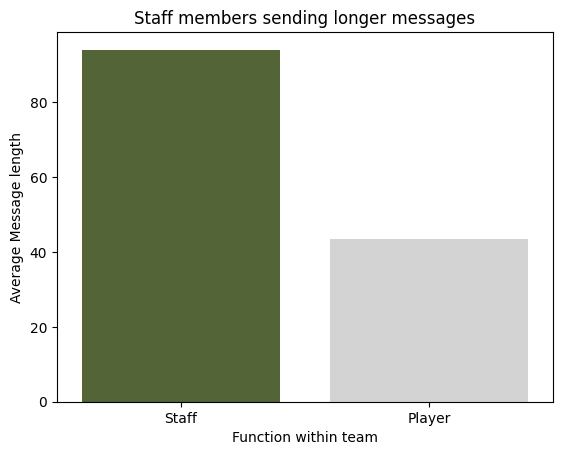

In [165]:
base_dataframe["message_length"] = base_dataframe["message"].str.len()

p1 = (
    base_dataframe[["function", "message_length"]]
    .groupby("function")
    .mean()
    .sort_values("message_length", ascending=False)
)

sns.barplot(x=p1.index, y=p1["message_length"], palette = ["darkolivegreen", "lightgrey"]  )
plt.xlabel("Function within team")
plt.ylabel("Average Message length")
plt.title("Staff members sending longer messages")

Show number of messages per year.

In [62]:
no_of_messages = (
    base_dataframe[["year", "month_name", "message", "has_image"]]
    .groupby("year")
    .agg(
        no_of_messages=("message","count"),
        no_of_images=("has_image", "sum")
    )
    .sort_values("year", ascending=True)
)
no_of_messages

,no_of_messages,no_of_images
year,,
2020,1447,33
2021,2916,241
2022,4560,663
2023,593,3
2024,1518,326
2025,408,112


Count the number of messages per day and group them.

In [107]:
month_day_count = base_dataframe.groupby(["month_name", "month_number", "day_of_month"]).size().unstack(fill_value = 0)
year_month_day_count = base_dataframe.groupby(["year", "month_name", "month_number", "day_of_month"]).size().unstack(fill_value = 0)
month_day_count.head()
year_month_day_count.head()
# average_per_day = month_day_count.mean(axis=0)

day_of_month                  1   2   3   4   5   6   7   8   9   10  ...  22  \
year month_name month_number                                          ...       
2020 August     8             24   7   6   2  21  13  34  16   0   7  ...   0   
     December   12             1   2   0   0   0   3   0  13   0   2  ...   1   
     July       7              0   7   5   2   0   0   1   1   1   0  ...  14   
     June       6             19   2  32   0   0   0   0  26   0   0  ...  26   
     May        5              0   0   0   0   0   0   0   0   0   0  ...  11   

day_of_month                  23  24  25  26  27  28  29  30  31  
year month_name month_number                                      
2020 August     8              2   2   0   4  16   3  13  15   0  
     December   12             0   2   3   0   0   0   0   0   3  
     July       7              0  42   3   3   2  25   3   6  22  
     June       6              2  18   1   0   0   0   0   3   0  
     May        5              0  21   3  10   0  23   1   1   0  

[5 rows x 31 columns]

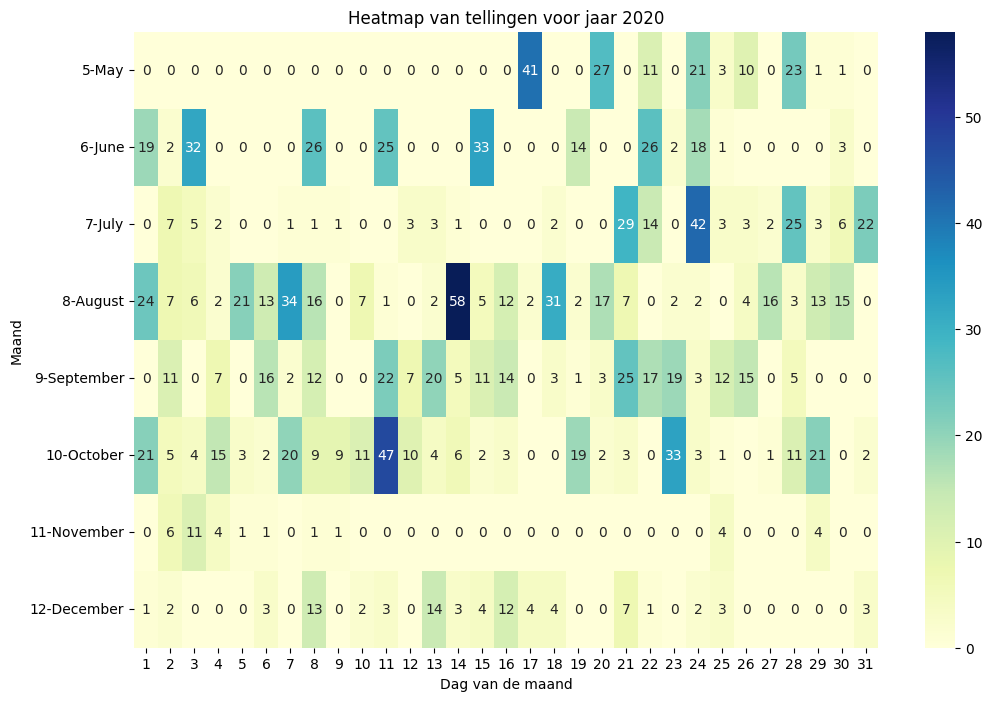

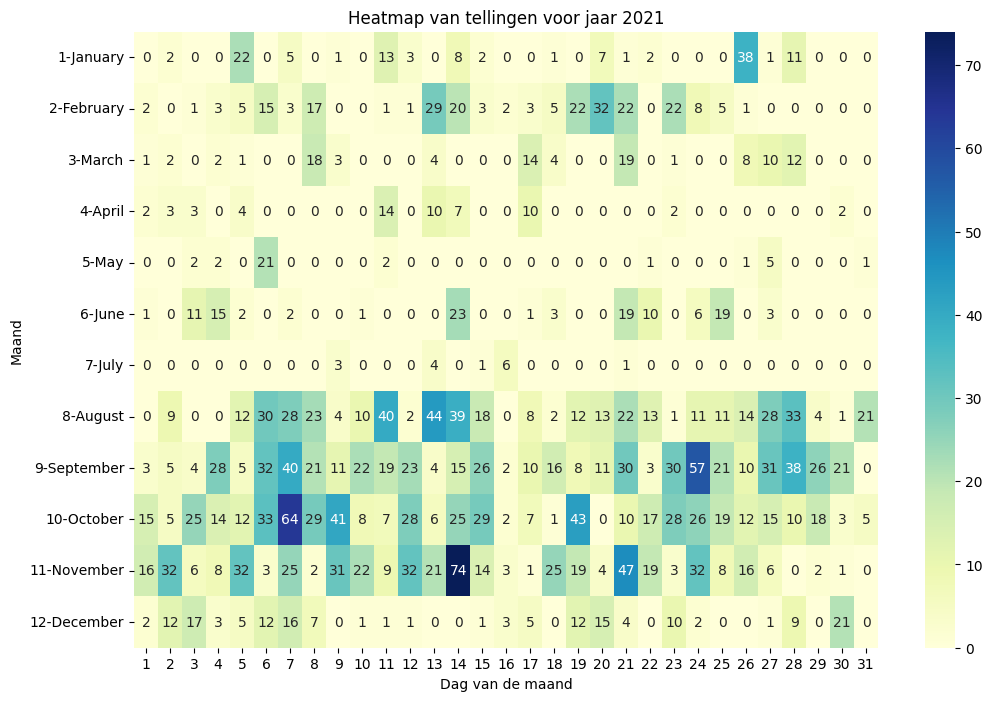

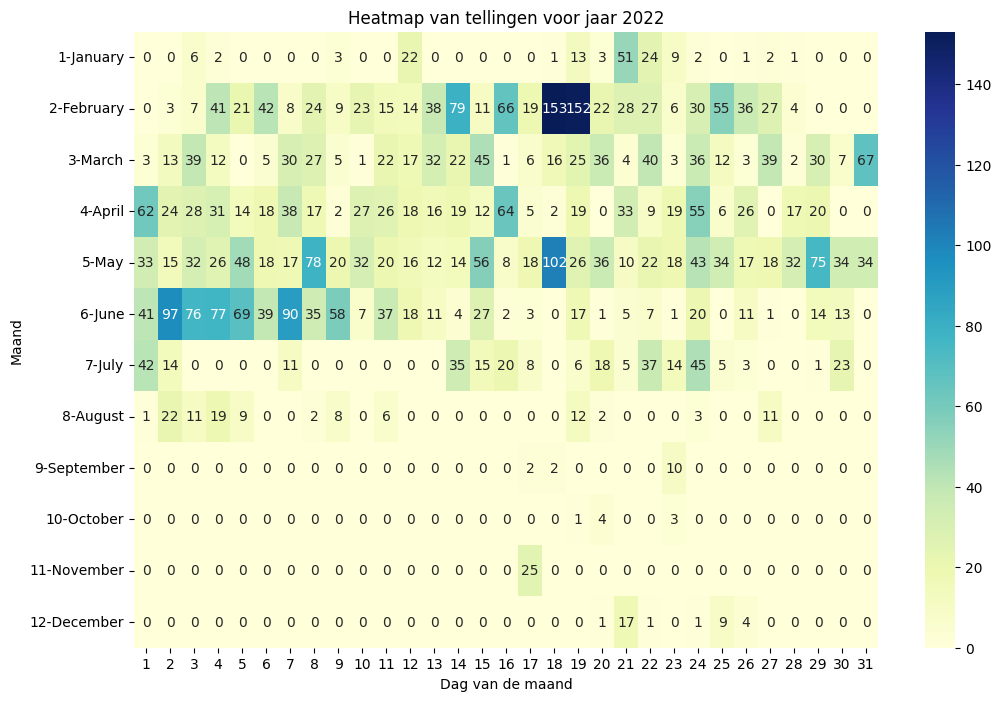

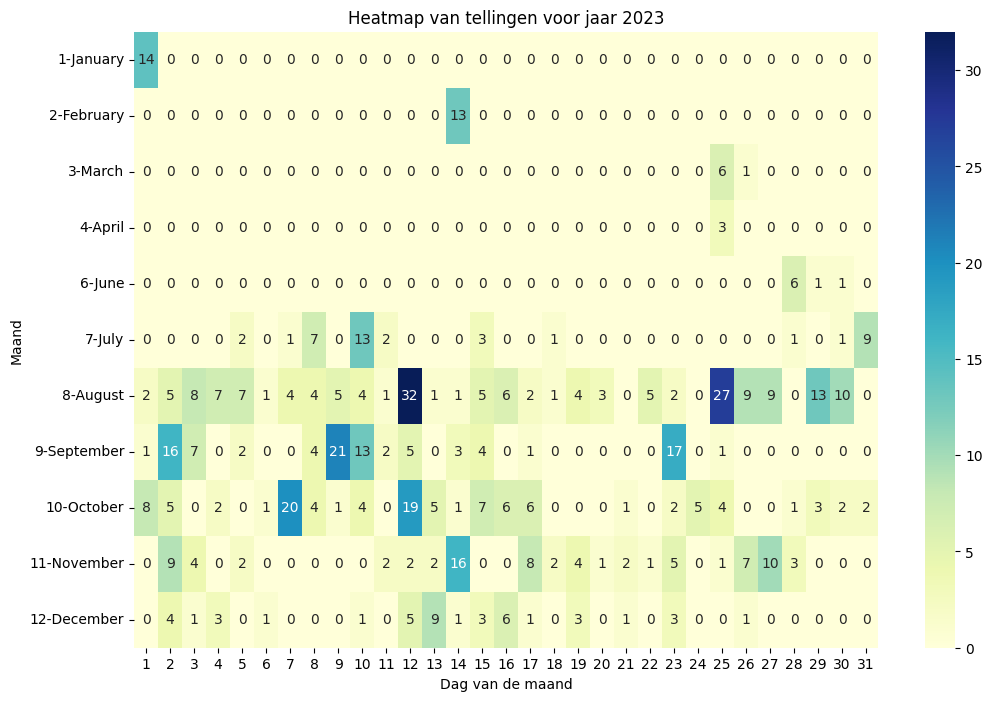

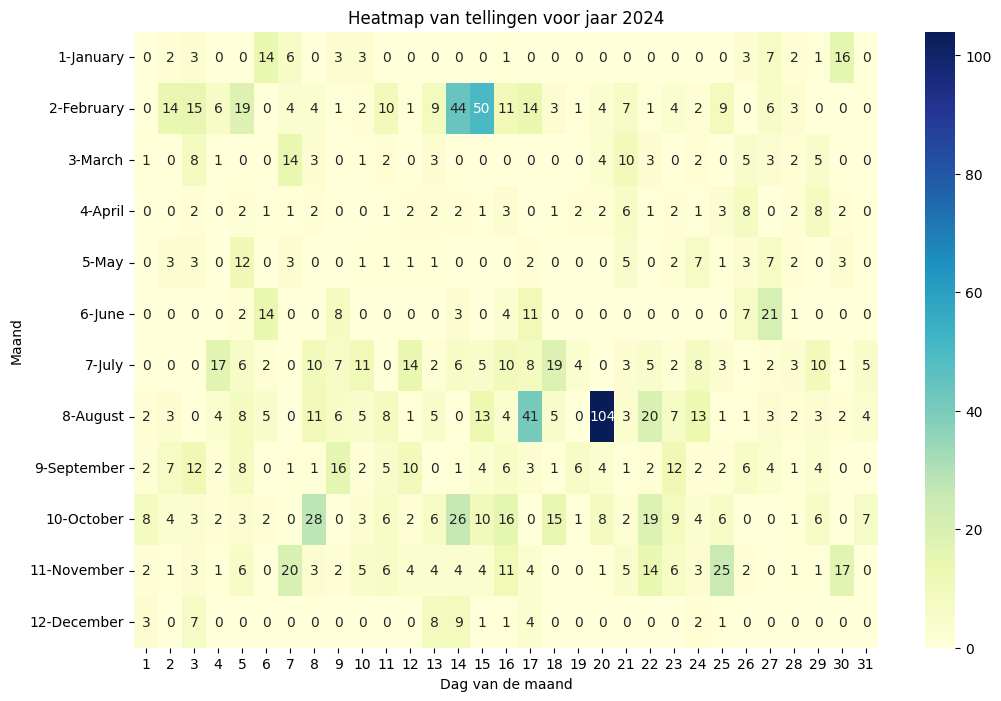

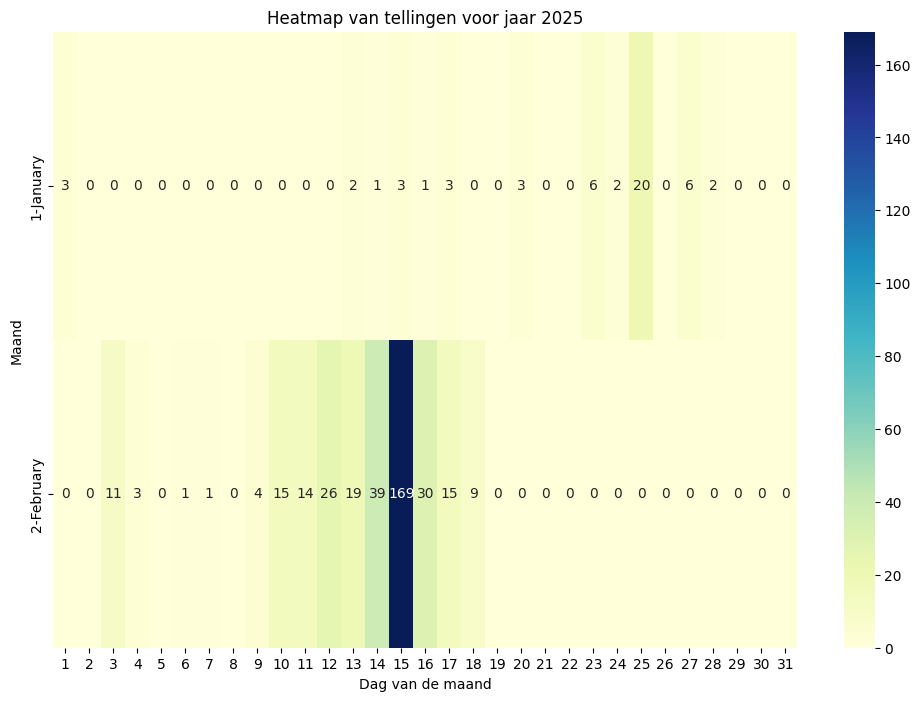

In [130]:
years = year_month_day_count.index.get_level_values('year').unique()

for year in years:
    data_for_year = year_month_day_count.loc[year]
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(data_for_year, cmap="YlGnBu", annot=True, fmt="d")
    plt.title(f"Heatmap van tellingen voor jaar {year}")
    plt.xlabel("Dag van de maand")
    plt.ylabel("Maand")
    plt.show()

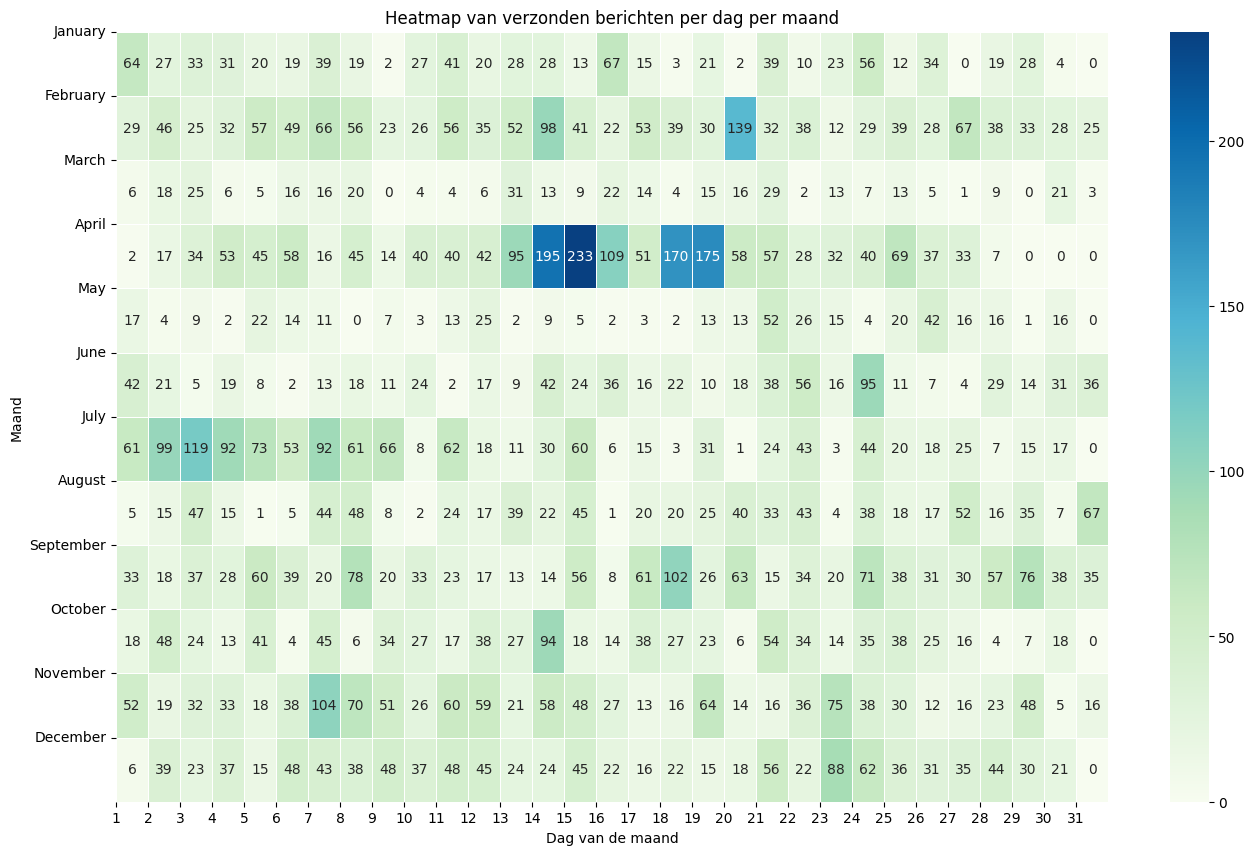

In [103]:
plt.figure(figsize=(16,10))
sns.heatmap(month_day_count, annot=True, fmt="d", linewidths=0.5, cmap="GnBu")
plt.xticks(
    ticks=range(31),
    labels=range(1, 32)
)

plt.yticks(
    ticks=range(12),
    labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    rotation=0
)

plt.title("Heatmap van verzonden berichten per dag per maand")
plt.xlabel("Dag van de maand")
plt.ylabel("Maand")
plt.show()